### 1. Import libraries for data loading and visualization 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hugging Face datasets
from datasets import load_dataset, Audio

### 2. Load SEAME datasets

In [21]:
dataset_sge = load_dataset("AudioLLMs/seame_dev_sge")
dataset_man = load_dataset("AudioLLMs/seame_dev_man")

### 3. Inspect datasets
- Data structure
- Quick audio sample playback
- Audio durations
- Transcription lengths

#### Data structure

In [22]:
print(dataset_sge)
print(dataset_man)

DatasetDict({
    test: Dataset({
        features: ['context', 'instruction', 'answer'],
        num_rows: 3222
    })
})
DatasetDict({
    test: Dataset({
        features: ['context', 'instruction', 'answer'],
        num_rows: 2610
    })
})


#### Quick audio sample playback

In [33]:
from IPython.display import Audio

# Get the first example from SGE
example = dataset_sge['test'][0]

# Get the audio array and sampling rate
y = example['context']['array']
sr = example['context']['sampling_rate']

# Play the audio
Audio(y, rate=sr)

In [23]:
# Cast 'context' to Audio with decode=True for automatic numpy arrays
dataset_sge = dataset_sge.cast_column("context", Audio(sampling_rate=16000, decode=True))
dataset_man = dataset_man.cast_column("context", Audio(sampling_rate=16000, decode=True))

In [24]:
# Inspect a single example
example = dataset_sge['test'][0]
print("Audio shape:", example['context']['array'].shape)
print("Sampling rate:", example['context']['sampling_rate'])
print("Transcript:", example['answer'])
print("Instruction:", example['instruction'])

Audio shape: (46544,)
Sampling rate: 16000
Transcript: hello hello 可以
Instruction: Convert the speech into a written transcript.


#### Audio durations

In [30]:
# Compute audio durations
def get_audio_durations(dataset):
    durations = []
    for ex in dataset['test']:
        y = ex['context']['array']
        sr = ex['context']['sampling_rate']
        durations.append(len(y)/sr)
    return durations

durations_sge = get_audio_durations(dataset_sge)
durations_man = get_audio_durations(dataset_man)

print("SGE audio durations (seconds):", round(np.mean(durations_sge),2), "±", round(np.std(durations_sge),2))
print("MAN audio durations (seconds):", round(np.mean(durations_man),2), "±", round(np.std(durations_man),2))

SGE audio durations (seconds): 2.74 ± 3.05
MAN audio durations (seconds): 3.5 ± 3.28


#### Transcription lengths

In [31]:
# Compute transcription lengths
def get_transcript_lengths(dataset):
    lengths = [len(ex['answer'].split()) for ex in dataset['test']]
    return lengths

lengths_sge = get_transcript_lengths(dataset_sge)
lengths_man = get_transcript_lengths(dataset_man)

print("SGE transcript length (words):", round(np.mean(lengths_sge),2), "±", round(np.std(lengths_sge),2))
print("MAN transcript length (words):", round(np.mean(lengths_man),2), "±", round(np.std(lengths_man),2))

SGE transcript length (words): 9.21 ± 10.54
MAN transcript length (words): 9.24 ± 8.46


### 4. Visualize distributions

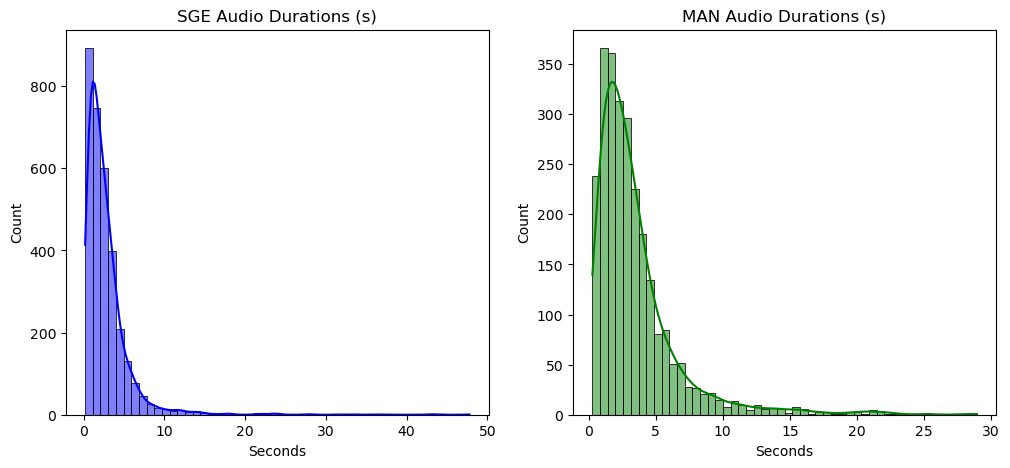

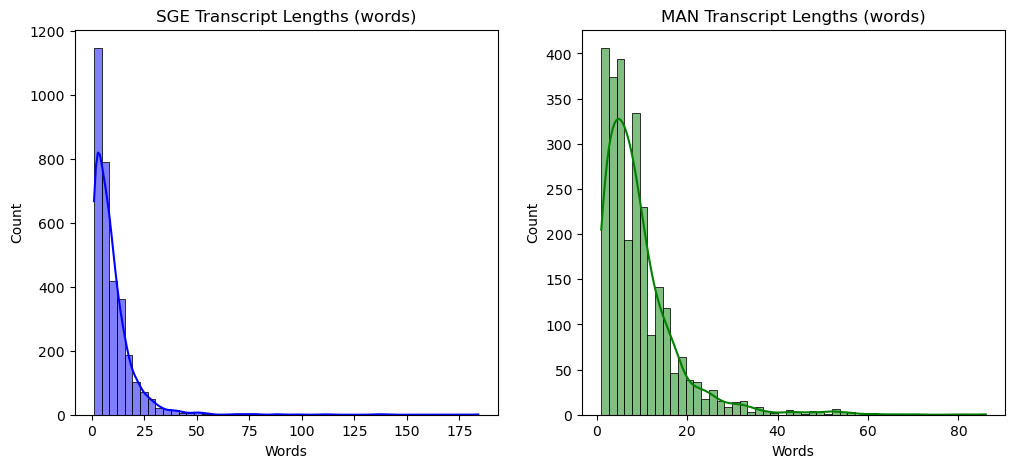

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(durations_sge, bins=50, color='blue', kde=True)
plt.title("SGE Audio Durations (s)")
plt.xlabel("Seconds")

plt.subplot(1,2,2)
sns.histplot(durations_man, bins=50, color='green', kde=True)
plt.title("MAN Audio Durations (s)")
plt.xlabel("Seconds")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(lengths_sge, bins=50, color='blue', kde=True)
plt.title("SGE Transcript Lengths (words)")
plt.xlabel("Words")

plt.subplot(1,2,2)
sns.histplot(lengths_man, bins=50, color='green', kde=True)
plt.title("MAN Transcript Lengths (words)")
plt.xlabel("Words")
plt.show()